In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Employee_Compensation.csv')

## Understanding the data and data preprocessing

In [3]:
data.head()

Organization Group Code Job Family Code Job Code Year Type  Year  \
0                        3            1400     1404    Fiscal  2019   
1                        3            9700     9703    Fiscal  2019   
2                        3            2900     2918    Fiscal  2019   
3                        3            2900     2918    Fiscal  2019   
4                        3            2900     2905    Fiscal  2019   

                         Organization Group Department Code      Department  \
0  Human Welfare & Neighborhood Development             HSA  Human Services   
1  Human Welfare & Neighborhood Development             HSA  Human Services   
2  Human Welfare & Neighborhood Development             HSA  Human Services   
3  Human Welfare & Neighborhood Development             HSA  Human Services   
4  Human Welfare & Neighborhood Development             HSA  Human Services   

   Union Code                   Union  ... Employee Identifier  Salaries  \
0       790.0  SEIU, Local 1021, Misc  ...            37486688  60720.01   
1       535.0  SEIU, Local 1021, Misc  ...            39646203  91677.00   
2       535.0  SEIU, Local 1021, Misc  ...            37486043  89106.03   
3       535.0  SEIU, Local 1021, Misc  ...            37615772  85581.11   
4       535.0  SEIU, Local 1021, Misc  ...            37500212  86457.00   

   Overtime  Other Salaries  Total Salary  Retirement  Health and Dental  \
0      0.00            0.00      60720.01    13653.20           14733.76   
1      0.00            0.00      91677.00    17524.20           14733.76   
2      0.00         1540.00      90646.03    17327.20           14733.76   
3   3355.94          337.75      89274.80    16359.16           14151.56   
4      0.00         2090.00      88547.00    16925.97           14733.76   

   Other Benefits  Total Benefits  Total Compensation  
0         4904.34        33291.30            94011.31  
1         7411.13        39669.09           131346.09  
2         7401.92        39462.88           130108.91  
3         7096.21        37606.93           126881.73  
4         7257.89        38917.62           127464.62  

[5 rows x 22 columns]

In [4]:
data.tail()

Organization Group Code Job Family Code Job Code Year Type  Year  \
840500                        2            7300     7345    Fiscal  2014   
840501                        2            7300     7345    Fiscal  2013   
840502                        2            7300     7345  Calendar  2016   
840503                        2            7300     7345  Calendar  2015   
840504                        2            7300     7345  Calendar  2014   

                             Organization Group Department Code  \
840500  Public Works, Transportation & Commerce             AIR   
840501  Public Works, Transportation & Commerce             AIR   
840502  Public Works, Transportation & Commerce             AIR   
840503  Public Works, Transportation & Commerce             AIR   
840504  Public Works, Transportation & Commerce             AIR   

                    Department  Union Code                        Union  ...  \
840500  AIR Airport Commission         6.0  Electrical Workers, Local 6  ...   
840501  AIR Airport Commission         6.0  Electrical Workers, Local 6  ...   
840502  AIR Airport Commission         6.0  Electrical Workers, Local 6  ...   
840503  AIR Airport Commission         6.0  Electrical Workers, Local 6  ...   
840504  AIR Airport Commission         6.0  Electrical Workers, Local 6  ...   

       Employee Identifier  Salaries  Overtime  Other Salaries  Total Salary  \
840500               53853  93249.36   5158.03          1740.0     100147.39   
840501               53853  91338.06    955.10          1860.0      94153.16   
840502               53853      0.00      0.00          2133.9       2133.90   
840503               53853  93580.00    593.51          1869.0      96042.51   
840504               53853  94305.09   2300.93          1560.0      98166.02   

        Retirement  Health and Dental  Other Benefits  Total Benefits  \
840500    20251.75           12512.55         8233.87        40998.17   
840501    16971.40           12801.79         7872.93        37646.12   
840502        0.00              98.16          163.24          261.40   
840503    19749.36           11946.64         7900.63        39596.63   
840504    20949.96           13054.94         8080.66        42085.56   

        Total Compensation  
840500           141145.56  
840501           131799.28  
840502             2395.30  
840503           135639.14  
840504           140251.58  

[5 rows x 22 columns]

In [5]:
data.shape

(840505, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840505 entries, 0 to 840504
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  840505 non-null  int64  
 1   Job Family Code          840505 non-null  object 
 2   Job Code                 840505 non-null  object 
 3   Year Type                840505 non-null  object 
 4   Year                     840505 non-null  int64  
 5   Organization Group       840505 non-null  object 
 6   Department Code          840503 non-null  object 
 7   Department               840503 non-null  object 
 8   Union Code               840325 non-null  float64
 9   Union                    840326 non-null  object 
 10  Job Family               840505 non-null  object 
 11  Job                      840500 non-null  object 
 12  Employee Identifier      840505 non-null  int64  
 13  Salaries                 840505 non-null  float64
 14  Over

In [7]:
data.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 180
Union                      179
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [8]:
numerical = data.select_dtypes(include = ['int64','float64'])

In [9]:
categorical = data.select_dtypes(exclude = ['int64','float64'])

In [10]:
numerical.columns

Index(['Organization Group Code', 'Year', 'Union Code', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [11]:
categorical.columns

Index(['Job Family Code', 'Job Code', 'Year Type', 'Organization Group',
       'Department Code', 'Department', 'Union', 'Job Family', 'Job'],
      dtype='object')

In [12]:
data.columns = [c.replace(' ','_') for c in data.columns]

In [13]:
data.columns

Index(['Organization_Group_Code', 'Job_Family_Code', 'Job_Code', 'Year_Type',
       'Year', 'Organization_Group', 'Department_Code', 'Department',
       'Union_Code', 'Union', 'Job_Family', 'Job', 'Employee_Identifier',
       'Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary', 'Retirement',
       'Health_and_Dental', 'Other_Benefits', 'Total_Benefits',
       'Total_Compensation'],
      dtype='object')

### Treating null values

In [14]:
data.Department_Code.fillna(data.Department_Code.mode()[0], inplace = True)
data.Department.fillna(data.Department.mode()[0], inplace = True)
data.Union_Code.fillna(data.Union_Code.median(), inplace = True)
data.Union.fillna(data.Union.mode()[0], inplace = True)
data.Job.fillna(data.Job.mode()[0], inplace = True)

In [15]:
data.isnull().sum()

Organization_Group_Code    0
Job_Family_Code            0
Job_Code                   0
Year_Type                  0
Year                       0
Organization_Group         0
Department_Code            0
Department                 0
Union_Code                 0
Union                      0
Job_Family                 0
Job                        0
Employee_Identifier        0
Salaries                   0
Overtime                   0
Other_Salaries             0
Total_Salary               0
Retirement                 0
Health_and_Dental          0
Other_Benefits             0
Total_Benefits             0
Total_Compensation         0
dtype: int64

# Level 1 analysis

In [16]:
def catAnalysis(col):
    print(f'Unique values : {data[col].unique()}')
    print(f'Mode : {data[col].mode()[0]}')

In [17]:
def NumAnalysis(var):
    print(f'Mean : {data[var].mean()}')
    print(f'Median : {data[var].median()}')
    print(f'Mode : {data[var].mode()[0]}')
    print(f'Standard Deviation : {data[var].std()}')

#### target variables are Total_Compensation, Department, Union, Job_Family, Salaries, Other Salaries, Total_Salary, Health and Dental, Other Benefits, Total_Benefits, Year, Employee Identifier, Overtime, Retirement, 

##### Total Compensation

In [18]:
NumAnalysis('Total_Compensation')

Mean : 114906.08007202807
Median : 114280.82
Mode : 268.74
Standard Deviation : 76318.35721230115


<Axes: xlabel='Total_Compensation', ylabel='Count'>

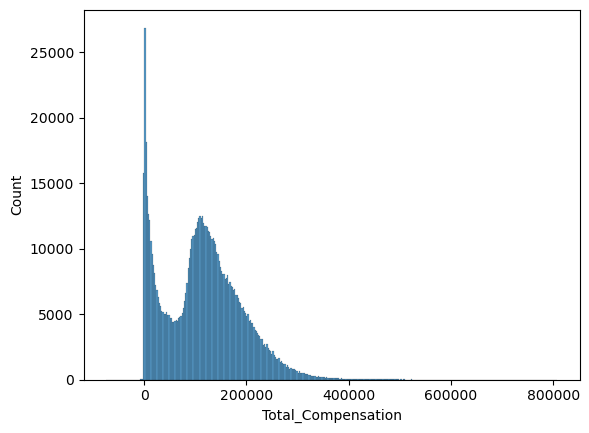

In [19]:
sns.histplot(data.Total_Compensation)

<Axes: >

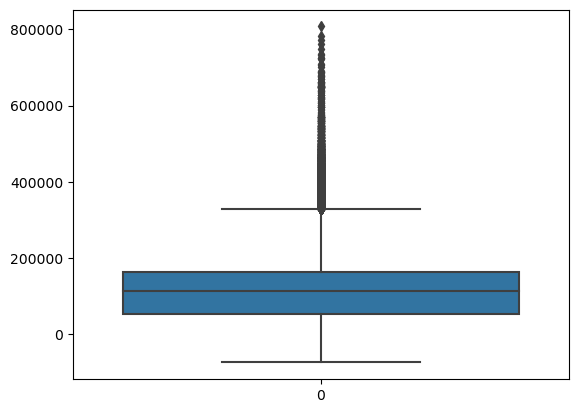

In [20]:
sns.boxplot(data.Total_Compensation)

In [21]:
mini = data.Total_Compensation.min()
maxi = data.Total_Compensation.max()
rang = maxi-mini

In [22]:
rang

881707.86

In [23]:
q1 = data.Total_Compensation.quantile(0.25)
q3 = data.Total_Compensation.quantile(0.75)
iqr = q3-q1
iqr

110556.44000000002

In [24]:
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [25]:
data = data[(data['Total_Compensation'] > lower) & (data['Total_Compensation'] < upper)]

<Axes: xlabel='Total_Compensation', ylabel='Count'>

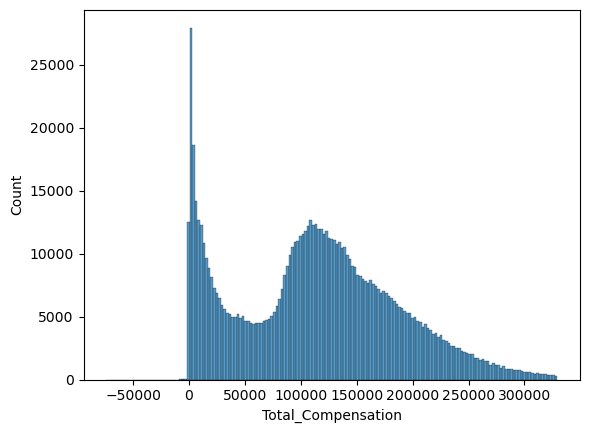

In [26]:
sns.histplot(data.Total_Compensation)

<Axes: >

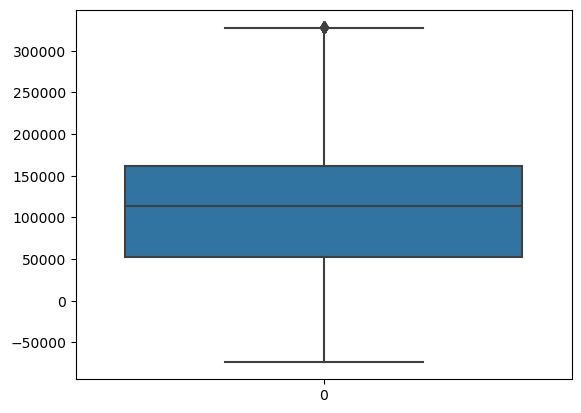

In [27]:
sns.boxplot(data.Total_Compensation)

##### Department

In [28]:
catAnalysis('Department')

Unique values : ['Human Services' 'Municipal Transportation Agcy' 'Police'
 'Airport Commission' 'City Attorney' 'Art Commission' 'Assessor'
 'Board Of Supervisors' 'Children Youth & Families' 'Controller'
 'City Planning' 'Board Of Appeals' 'Children & Families Commission'
 'Child Support Services' 'District Attorney' 'Trial Courts'
 'Building Inspection' 'Civil Service Commission' 'Public Health'
 'Dept of Emergency Management' 'Dept of Police Accountablility'
 'Department Of Public Works' 'Economic Workforce Development'
 'Fire Department' 'Fine Arts Museum' 'Environment' 'Ethics Commission'
 'Homeless Services' 'Human Resources' 'Human Rights Commission'
 'Juvenile Court' 'Health Service System' 'Public Library' 'Mayor'
 'Public Defender' 'Sheriff' 'Retirement Services'
 'Rent Arbitration Board' 'Academy Of Sciences' 'Registrar'
 'Adult Probation' 'Department of Technology'
 'Public Utilities Commission' 'Asian Art Museum'
 'Administrative Services' 'Port' 'Recreation And Park Comm

([<matplotlib.patches.Wedge at 0x1711b1b7d90>,
 [Text(1.0017961490139426, 0.4543175935629551, 'Public Health'),
  Text(0.45746848883575747, 1.0003612256191903, 'Municipal Transportation Agcy'),
  Text(-0.14922591907157165, 1.089831007577434, 'DPH Public Health'),
  Text(-0.6170870019752817, 0.9106061893009287, 'MTA Municipal Transprtn Agncy'),
  Text(-0.8765126935554118, 0.6646243285016258, 'Police'),
  Text(-1.0253638268163097, 0.3982825914556307, 'Human Services'),
  Text(-1.0919791727868136, 0.13259519674492995, 'Public Utilities Commission'),
  Text(-1.0949456629187277, -0.10532803641703355, 'HSA Human Services Agency'),
  Text(-1.0509669820084797, -0.3247589917584854, 'POL Police'),
  Text(-0.965651592434338, -0.5267988250072578, 'Recreation And Park Commission'),
  Text(-0.8528464528092112, -0.6947322706847193, 'Airport Commission'),
  Text(-0.7239372176182522, -0.8281997977222305, 'Fire Department'),
  Text(-0.5843845010739285, -0.9319306599230308, 'Department Of Public Works'),

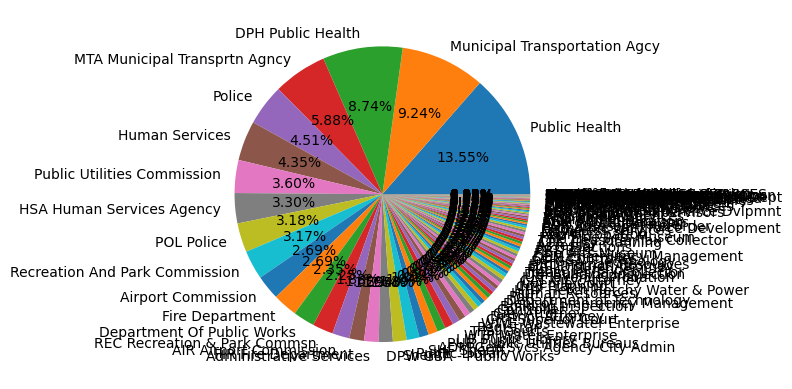

In [29]:
percentage = data.Department.value_counts()
plt.pie(percentage, labels = percentage.index, autopct = '%0.2f%%')

##### Union

In [30]:
catAnalysis('Union')

Unique values : ['SEIU, Local 1021, Misc' 'Laborers, Local 261'
 'Stationary Engineers, Local 39' 'TWU, Local 250-A, TransitOpr'
 'Auto Machinist, Local 1414' 'Prof & Tech Eng, Local 21'
 'Electrical Workers, Local 6' 'SF City Workers United' 'POA'
 'Teamsters, Local 853' 'Carpenters, Local 22' 'Plumbers, Local 38'
 'Municipal Exec Assoc, Misc' 'Sheet Metal Workers, Local 104'
 'BrickLayers, Local 3' 'Municipal Attorneys Assoc'
 'Member, Board Or Commission' 'TWU, Local 200' 'Commissioner No Benefits'
 'Utd Pub EmpL790 SEIU-Crt Clrks' 'Court-Unrep Professional'
 'SFDA Investigators Assn' 'Court-Supr Court Interpreters' 'Court-MEA'
 'Court Local 21 Staff Attorneys' 'Building Inspects - 6331/33'
 'Court-Local 21 Professional' 'Court-Court Reporters' 'Court-Judge'
 'SF Courts Commissioner Assoc' 'SEIU, Local 1021, RN'
 'Physician/Dentists 8-CC, UAPD' 'Teamsters, Local 856, Multi'
 'Teamsters, Local 856, Spv RN' 'TWU, Local 250-A, Misc'
 'Hod Carriers, LiUNA, Local 261' 'Operating Engineer

([<matplotlib.patches.Wedge at 0x1711bdc4d30>,
 [Text(0.8273424801003989, 0.7249168370380986, 'SEIU, Local 1021, Misc'),
  Text(-0.24625546769468143, 1.072081267736021, 'SEIU - Miscellaneous, Local 1021'),
  Text(-0.8349769579832061, 0.7161099633695313, 'Prof & Tech Eng, Local 21'),
  Text(-1.0601835492742135, 0.29327605058772077, 'Prof & Tech Engineers - Miscellaneous, Local 21'),
  Text(-1.098919244729647, -0.048749292946898955, 'SEIU, Local 1021, RN'),
  Text(-1.043769735769978, -0.34719553380000506, 'TWU, Local 250-A, TransitOpr'),
  Text(-0.9360182485882935, -0.5778147093227238, 'POA'),
  Text(-0.7995636559074087, -0.7554455375154314, 'SEIU - Staff and Per Diem Nurses, Local 1021'),
  Text(-0.6425688456332964, -0.8928075260779856, 'Laborers, Local 261'),
  Text(-0.4748219142521172, -0.9922419814470436, "Police Officers' Association"),
  Text(-0.30914912000057243, -1.0556641613708746, 'Firefighters,Local 798, Unit 1'),
  Text(-0.1404291746772766, -1.0909993798804192, 'Transport Wor

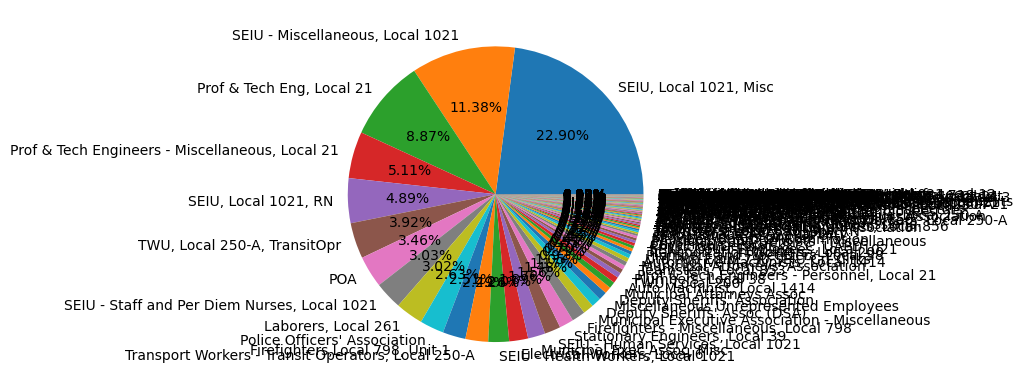

In [31]:
percentage = data.Union.value_counts()
plt.pie(percentage, labels = percentage.index, autopct = '%0.2f%%')

##### Job family

In [32]:
catAnalysis('Job_Family_Code')

Unique values : ['1400' '9700' '2900' '9900' '7300' '1900' '9100' '5200' '8200' '1000'
 '7500' 'Q000' '9200' '0000' '2700' '3500' '1800' '6100' '6300' '7200'
 '0900' '5500' '6200' '5300' '1600' '8100' '4200' '1200' '1300' '1500'
 '2300' '2500' '2200' '2400' '2800' '2600' '7100' '2100' '3400' '7400'
 '5100' '1700' 'H000' '3300' '5600' '4300' '8300' '8400' '3600' '9500'
 '1100' '5400' '8600' '9300' '4100' '3200' '__UNASSIGNED__' 'SCRT' 'SFRA']
Mode : 2300


([<matplotlib.patches.Wedge at 0x1711aac2110>,
 [Text(1.0398003873452593, 0.3589082814266745, '2300'),
  Text(0.6568696533517466, 0.8823390836325661, '9100'),
  Text(0.20049601512791596, 1.0815735517836162, 'Q000'),
  Text(-0.20973474669731337, 1.079820047983836, '7300'),
  Text(-0.567600469374841, 0.9422471582156459, '2900'),
  Text(-0.8226803677619754, 0.7302034048804628, '1400'),
  Text(-0.9869698314632382, 0.48568565119985513, '9900'),
  Text(-1.0787476230874307, 0.2151826333216015, 'H000'),
  Text(-1.099273751536735, -0.03996522466285788, '2700'),
  Text(-1.0685584775521673, -0.26111832576706406, '1800'),
  Text(-0.9985573436971449, -0.4613927083824606, '0900'),
  Text(-0.8949988294665491, -0.6395131705082446, '8200'),
  Text(-0.762400837173929, -0.7929344004875134, '5200'),
  Text(-0.6107127425908251, -0.9148934069262894, '3200'),
  Text(-0.45066012925415033, -1.0034467837910652, '1000'),
  Text(-0.28370036616291916, -1.0627860096176587, '8300'),
  Text(-0.11975264023047948, -1.0

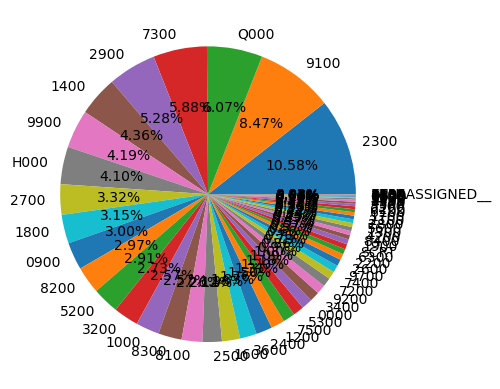

In [33]:
percentage = data.Job_Family_Code.value_counts()
plt.pie(percentage, labels = percentage.index, autopct = '%0.2f%%')

##### Salaries

In [34]:
NumAnalysis('Salaries')

Mean : 73415.86744525608
Median : 72319.05
Mode : 0.0
Standard Deviation : 48423.033204174324


<Axes: xlabel='Salaries', ylabel='Count'>

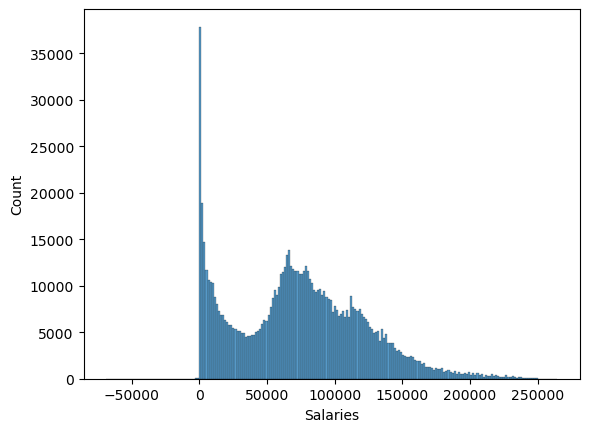

In [35]:
sns.histplot(data.Salaries)

<Axes: >

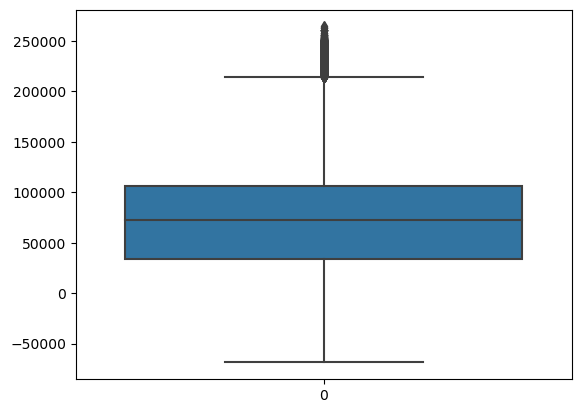

In [36]:
sns.boxplot(data.Salaries)

In [37]:
q1 = data.Salaries.quantile(0.25)
q3 = data.Salaries.quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
data = data[(data['Salaries'] > lower) & (data['Salaries'] < upper)]

<Axes: xlabel='Salaries', ylabel='Count'>

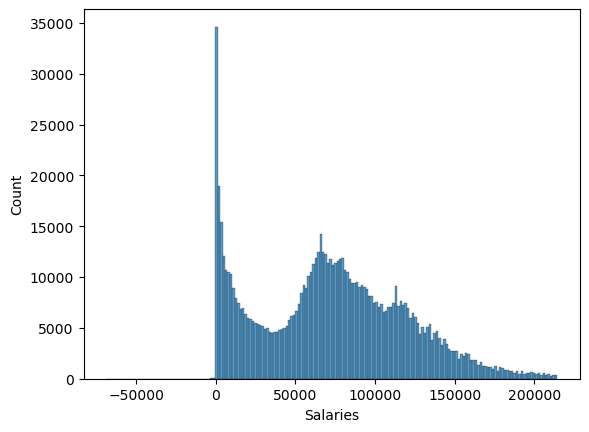

In [38]:
sns.histplot(data.Salaries)

<Axes: >

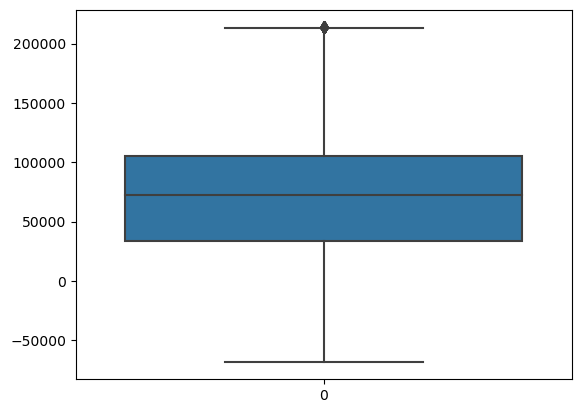

In [39]:
sns.boxplot(data.Salaries)

##### Other_Salaries

In [40]:
NumAnalysis('Other_Salaries')

Mean : 3730.203722060043
Median : 776.6
Mode : 0.0
Standard Deviation : 7208.366019932029


<Axes: xlabel='Other_Salaries', ylabel='Count'>

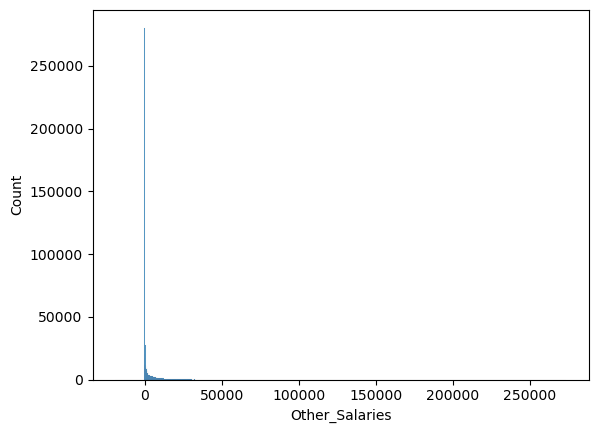

In [41]:
sns.histplot(data.Other_Salaries)

<Axes: >

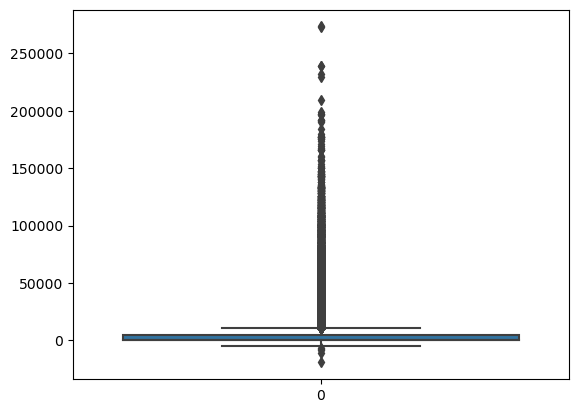

In [42]:
sns.boxplot(data.Other_Salaries)

##### Total_Salary

In [43]:
NumAnalysis('Total_Salary')

Mean : 82163.40101472629
Median : 79418.13
Mode : 250.0
Standard Deviation : 55415.1938674166


<Axes: xlabel='Total_Salary', ylabel='Count'>

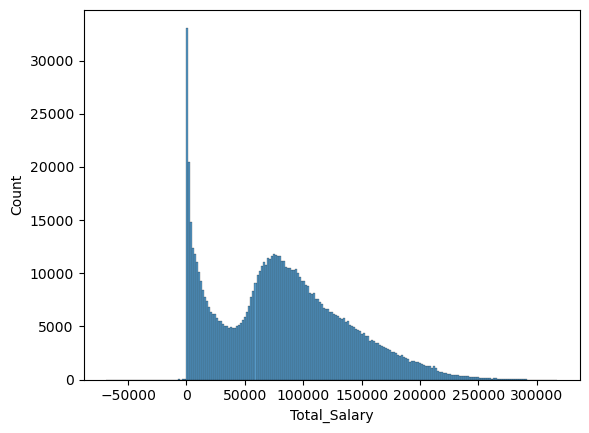

In [44]:
sns.histplot(data.Total_Salary)

<Axes: >

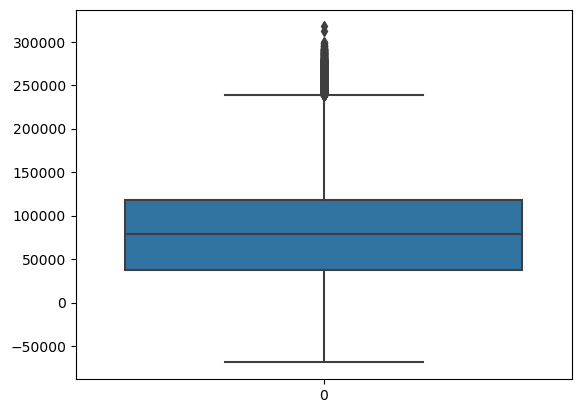

In [45]:
sns.boxplot(data.Total_Salary)

In [46]:
q1 = data.Total_Salary.quantile(0.25)
q3 = data.Total_Salary.quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
data = data[(data['Total_Salary'] > lower) & (data['Total_Salary'] < upper)]

<Axes: xlabel='Total_Salary', ylabel='Count'>

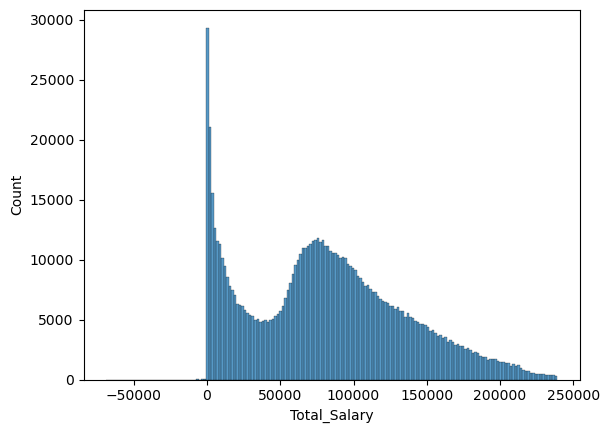

In [47]:
sns.histplot(data.Total_Salary)

<Axes: >

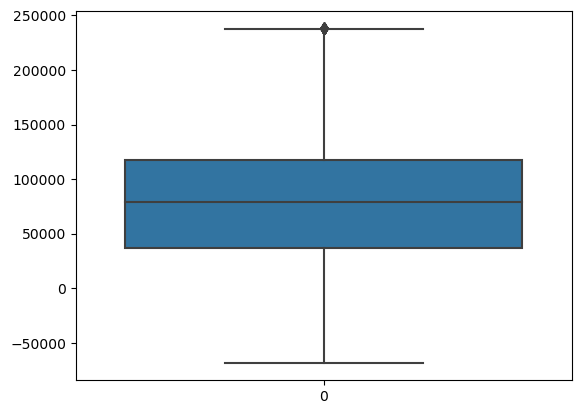

In [48]:
sns.boxplot(data.Total_Salary)

##### Other_Benefits

In [49]:
NumAnalysis('Other_Benefits')

Mean : 5258.964489477034
Median : 5201.155
Mode : 0.0
Standard Deviation : 3737.585931194335


<Axes: xlabel='Other_Benefits', ylabel='Count'>

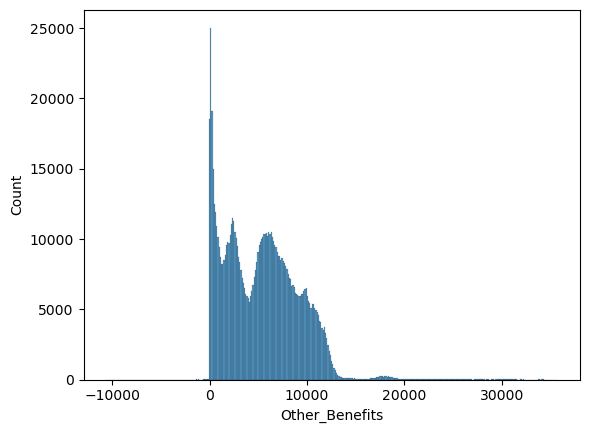

In [50]:
sns.histplot(data.Other_Benefits)

<Axes: >

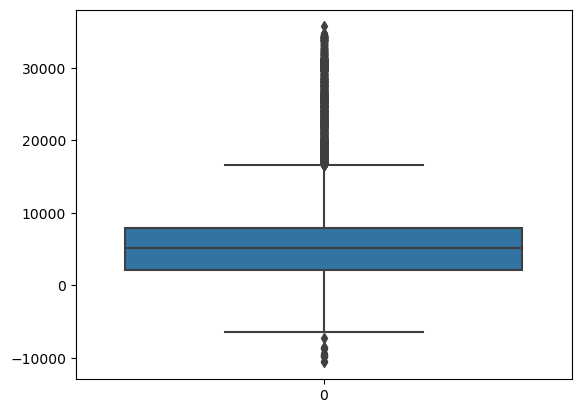

In [51]:
sns.boxplot(data.Other_Benefits)

In [52]:
q1 = data.Other_Benefits.quantile(0.25)
q3 = data.Other_Benefits.quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
data = data[(data['Other_Benefits'] > lower) & (data['Other_Benefits'] < upper)]

<Axes: xlabel='Other_Benefits', ylabel='Count'>

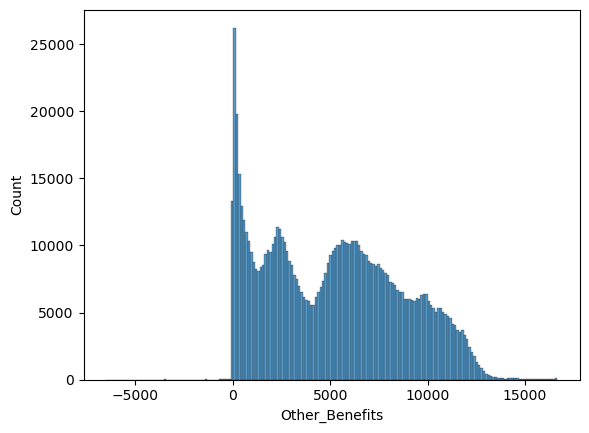

In [53]:
sns.histplot(data.Other_Benefits)

<Axes: >

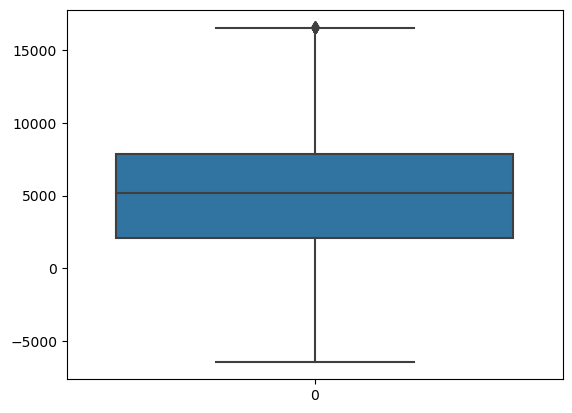

In [54]:
sns.boxplot(data.Other_Benefits)

##### Total_Benefits

In [55]:
NumAnalysis('Total_Benefits')

Mean : 29633.867029095785
Median : 33419.185
Mode : 0.0
Standard Deviation : 18224.670765109862


<Axes: xlabel='Total_Benefits', ylabel='Count'>

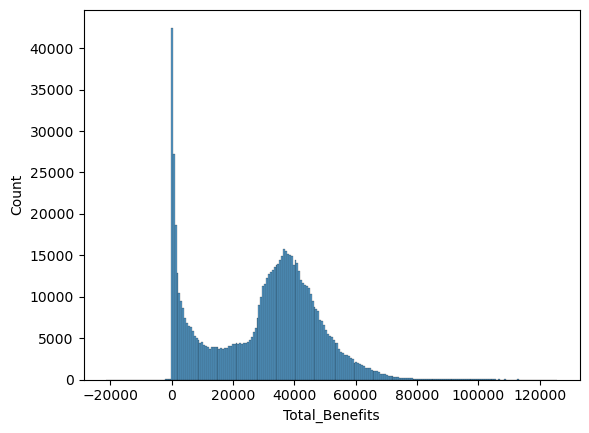

In [56]:
sns.histplot(data.Total_Benefits)

<Axes: >

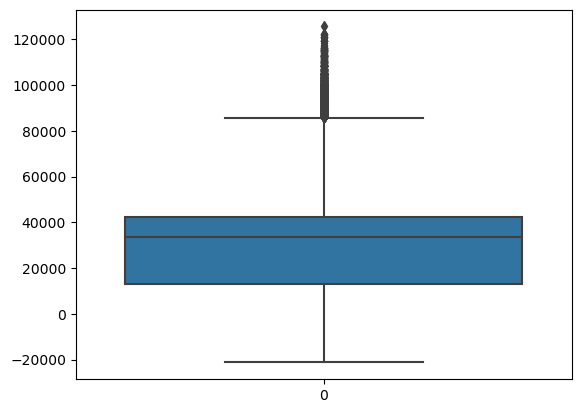

In [57]:
sns.boxplot(data.Total_Benefits)

In [58]:
q1 = data.Total_Benefits.quantile(0.25)
q3 = data.Total_Benefits.quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
data = data[(data['Total_Benefits'] > lower) & (data['Total_Benefits'] < upper)]

<Axes: xlabel='Total_Benefits', ylabel='Count'>

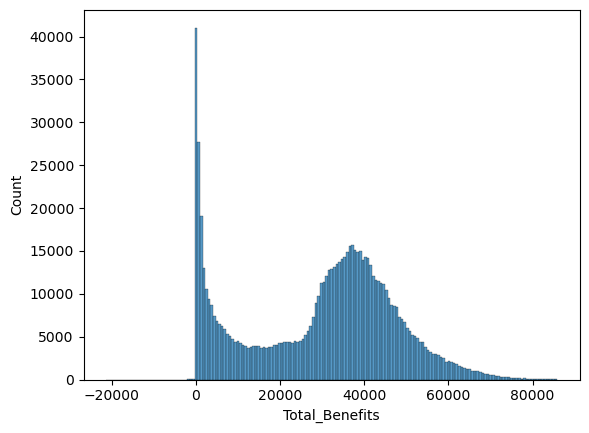

In [59]:
sns.histplot(data.Total_Benefits)

<Axes: >

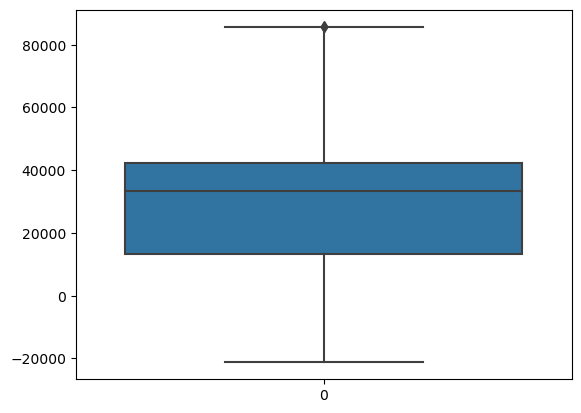

In [60]:
sns.boxplot(data.Total_Benefits)

##### Health_and_Dental

In [61]:
NumAnalysis('Health_and_Dental')

Mean : 9958.09632727286
Median : 12512.55
Mode : 0.0
Standard Deviation : 6334.472550916888


<Axes: xlabel='Health_and_Dental', ylabel='Count'>

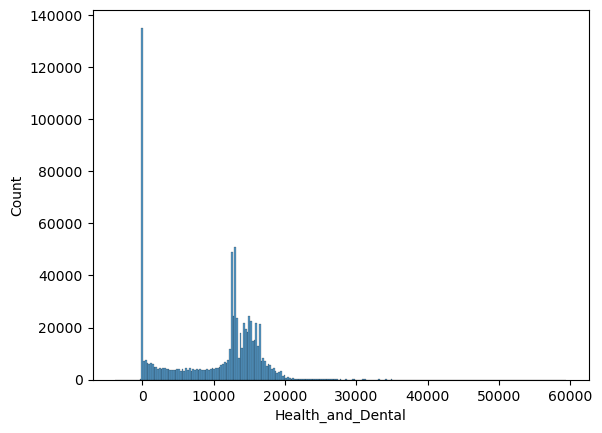

In [62]:
sns.histplot(data.Health_and_Dental)

<Axes: >

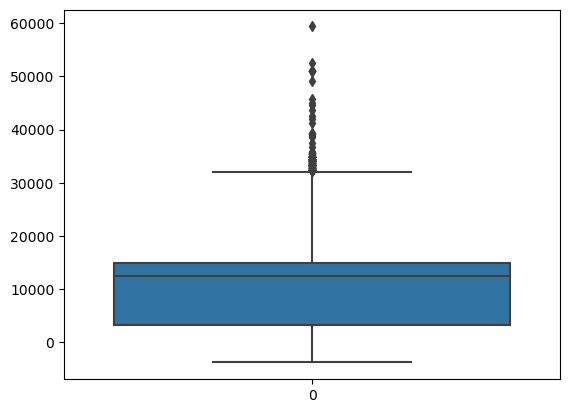

In [63]:
sns.boxplot(data.Health_and_Dental)

##### Year

In [64]:
NumAnalysis('Year')

Mean : 2017.4725730268308
Median : 2017.0
Mode : 2019
Standard Deviation : 2.8257060963921274


<Axes: xlabel='Year', ylabel='Count'>

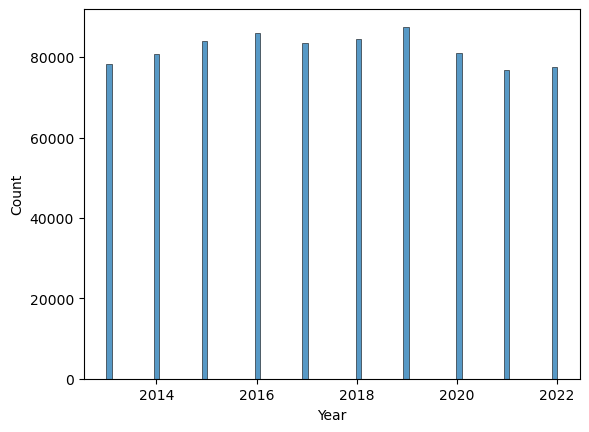

In [65]:
sns.histplot(data.Year)

<Axes: >

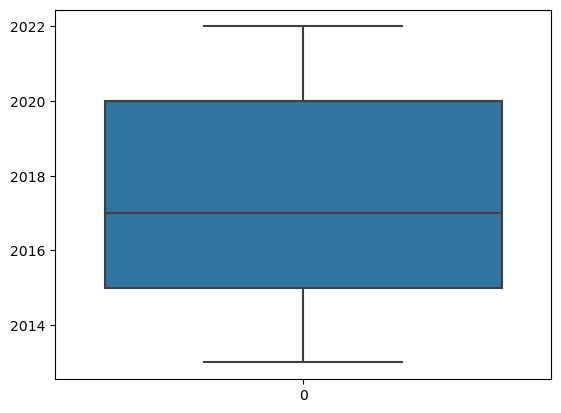

In [66]:
sns.boxplot(data.Year)

##### Overtime

In [67]:
NumAnalysis('Overtime')

Mean : 5579.039220303399
Median : 0.0
Mode : 0.0
Standard Deviation : 12352.436781662693


<Axes: xlabel='Overtime', ylabel='Count'>

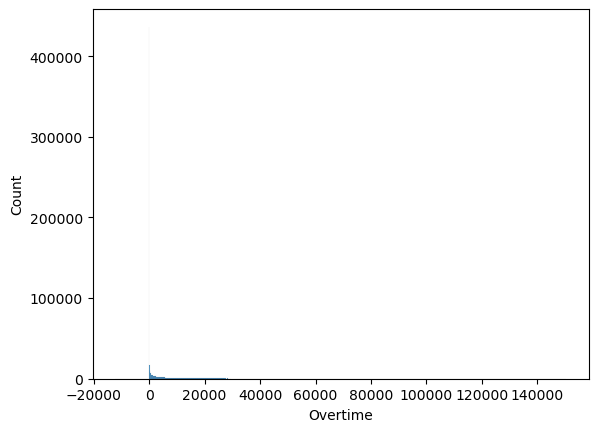

In [68]:
sns.histplot(data.Overtime)

<Axes: >

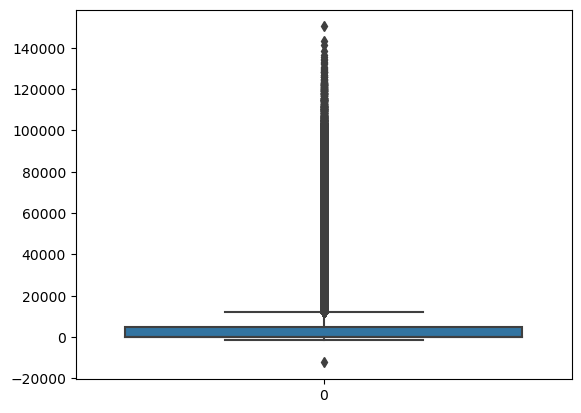

In [69]:
sns.boxplot(data.Overtime)

##### Retirement

In [70]:
NumAnalysis('Retirement')

Mean : 14417.338013382463
Median : 14840.645
Mode : 0.0
Standard Deviation : 10265.751452260753


<Axes: xlabel='Retirement', ylabel='Count'>

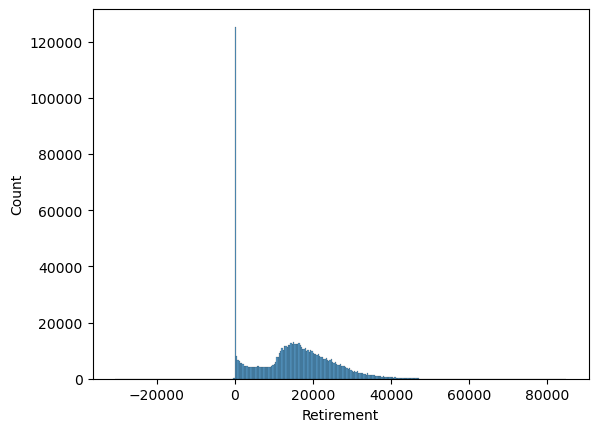

In [71]:
sns.histplot(data.Retirement)

<Axes: >

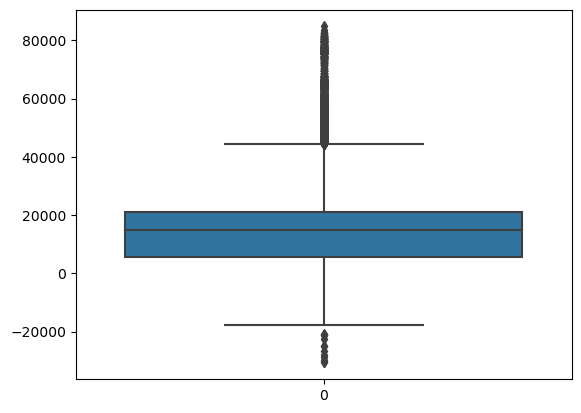

In [72]:
sns.boxplot(data.Retirement)

In [73]:
q1 = data.Retirement.quantile(0.25)
q3 = data.Retirement.quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
data = data[(data['Retirement'] > lower) & (data['Retirement'] < upper)]

<Axes: xlabel='Retirement', ylabel='Count'>

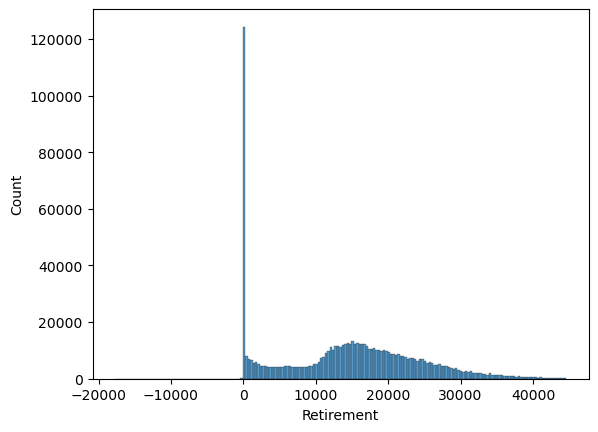

In [74]:
sns.histplot(data.Retirement)

<Axes: >

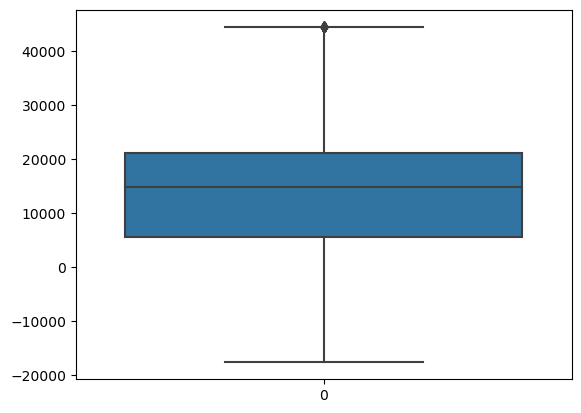

In [75]:
sns.boxplot(data.Retirement)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817288 entries, 0 to 840504
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization_Group_Code  817288 non-null  int64  
 1   Job_Family_Code          817288 non-null  object 
 2   Job_Code                 817288 non-null  object 
 3   Year_Type                817288 non-null  object 
 4   Year                     817288 non-null  int64  
 5   Organization_Group       817288 non-null  object 
 6   Department_Code          817288 non-null  object 
 7   Department               817288 non-null  object 
 8   Union_Code               817288 non-null  float64
 9   Union                    817288 non-null  object 
 10  Job_Family               817288 non-null  object 
 11  Job                      817288 non-null  object 
 12  Employee_Identifier      817288 non-null  int64  
 13  Salaries                 817288 non-null  float64
 14  Over

# Level 2 analysis

<Axes: xlabel='Total_Compensation', ylabel='Department'>

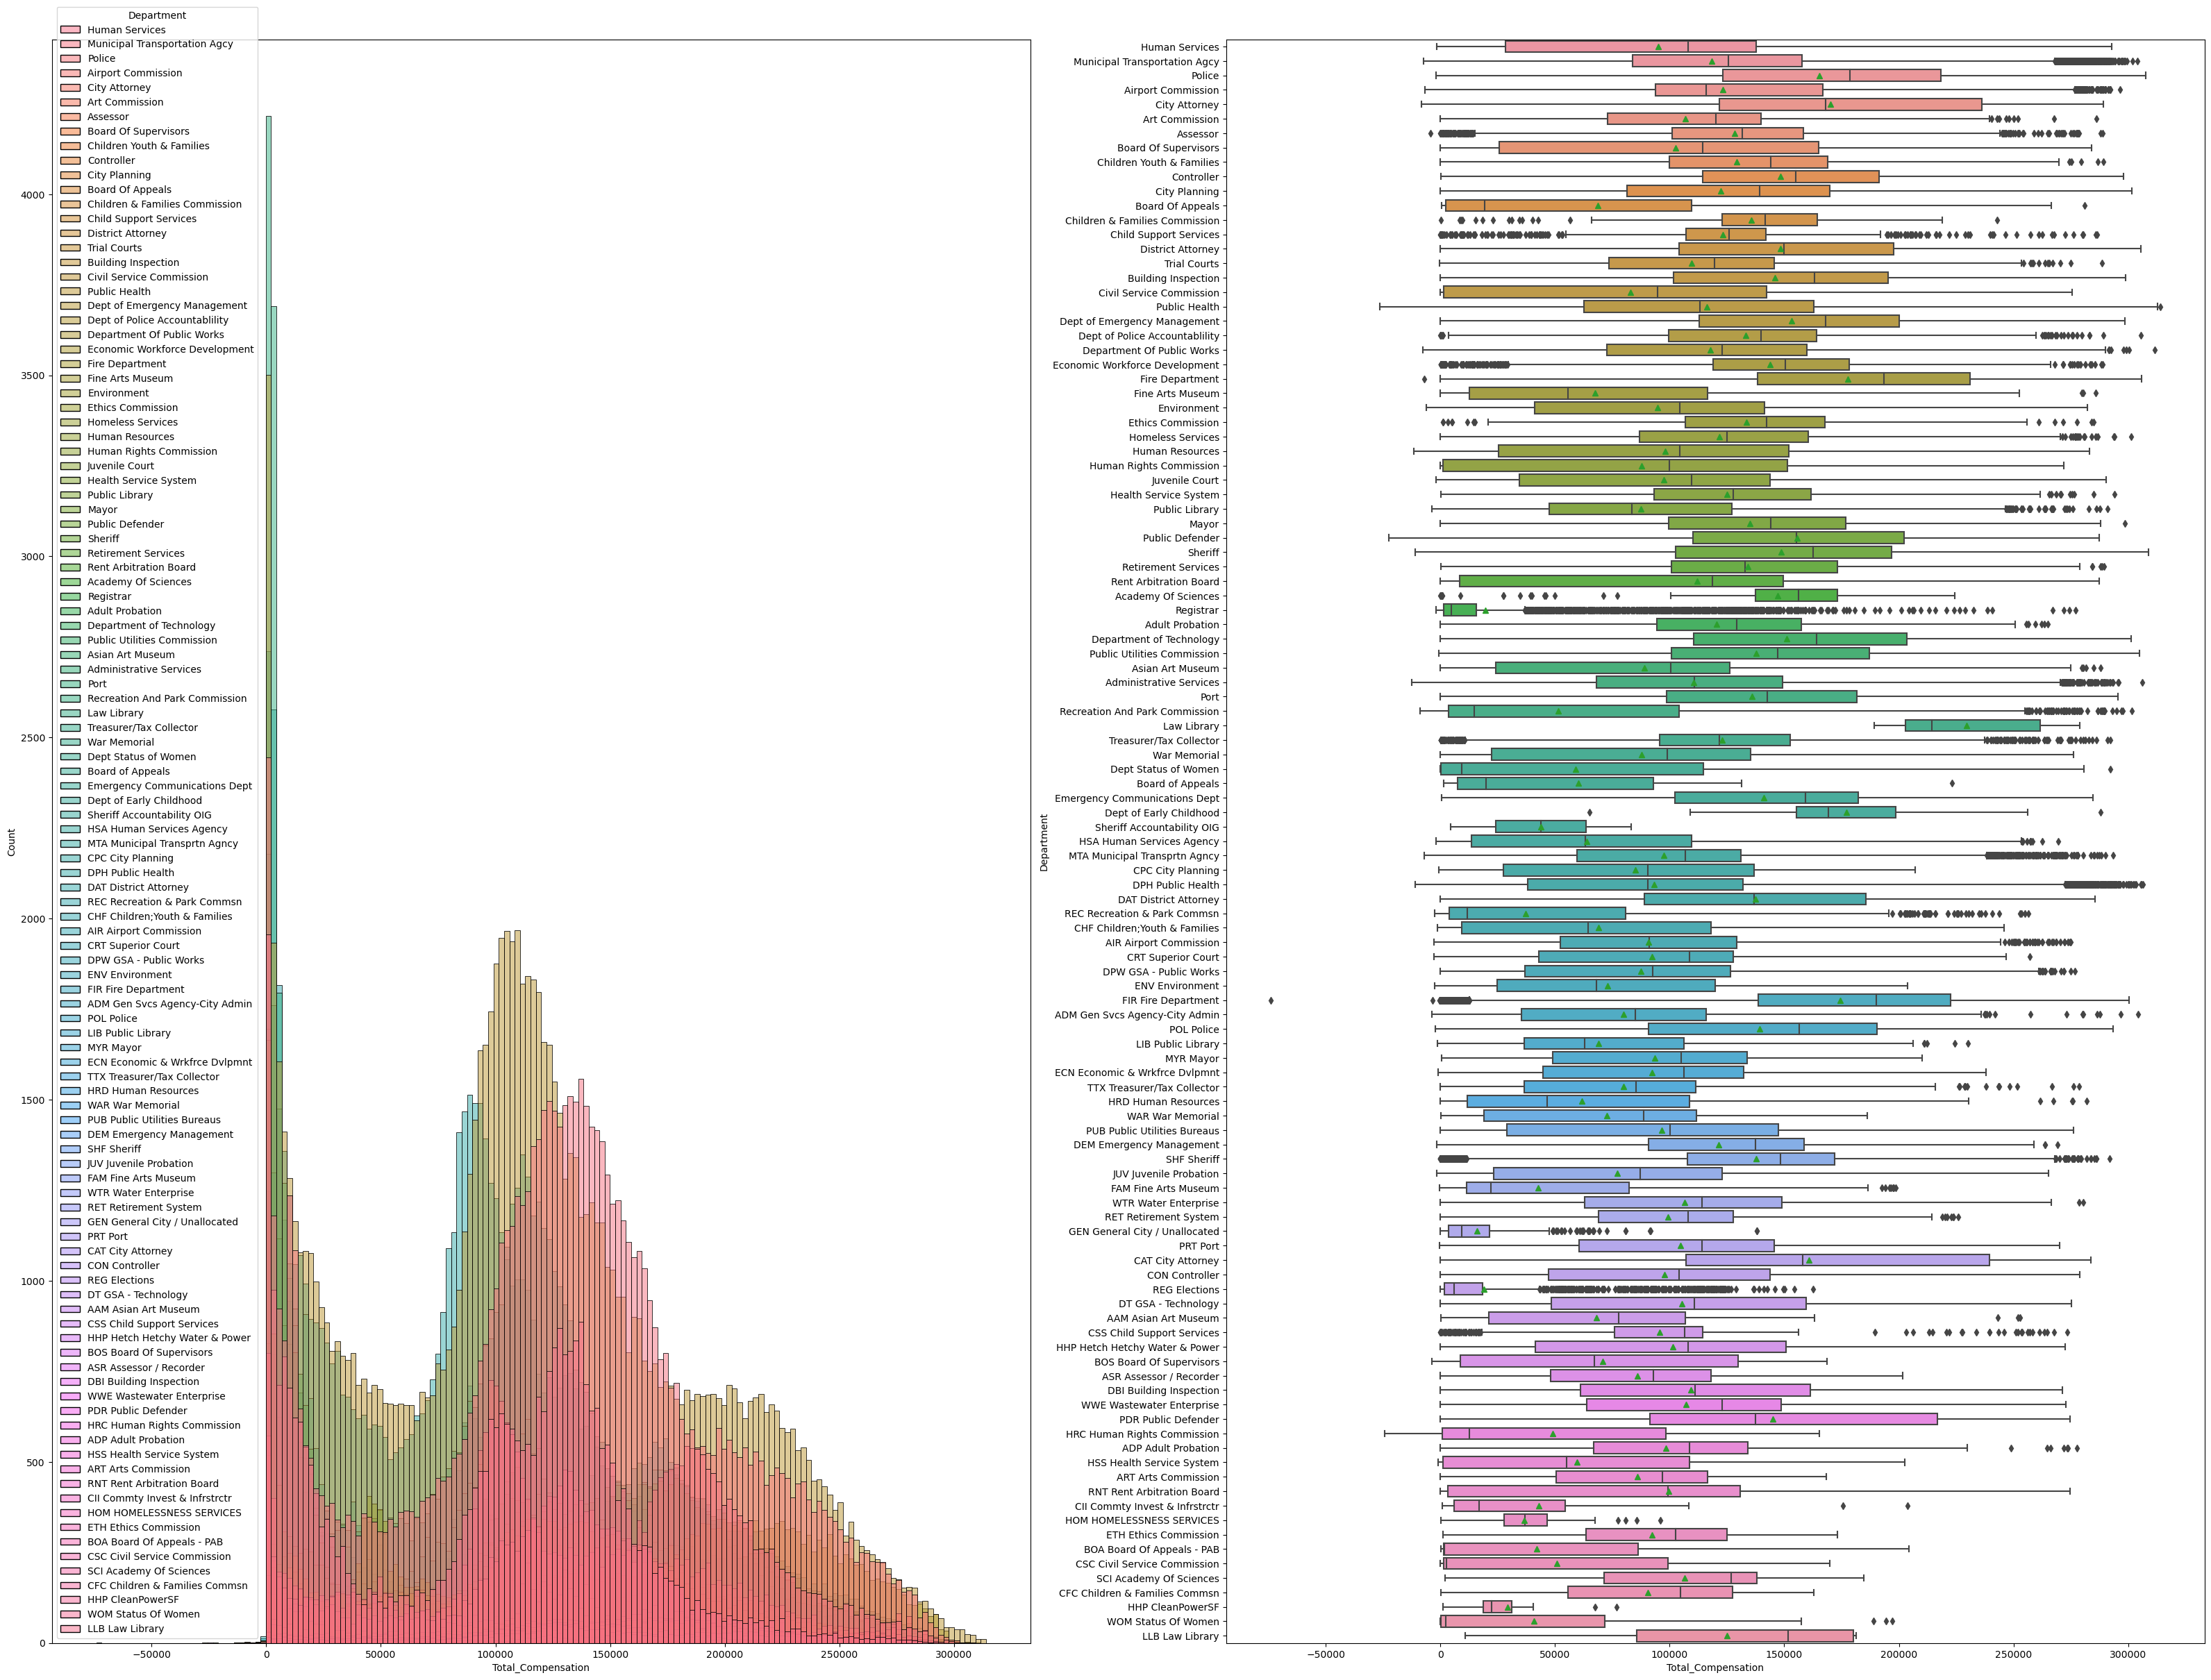

In [77]:
#Total compensation vs Department
fig,ax=plt.subplots(1,2, figsize=(40,30))
sns.histplot(x=data['Total_Compensation'],hue=data['Department'],ax=ax[0])
sns.boxplot(x=data['Total_Compensation'],y=data['Department'],ax=ax[1],showmeans=True)

<Axes: xlabel='Total_Salary', ylabel='Department'>

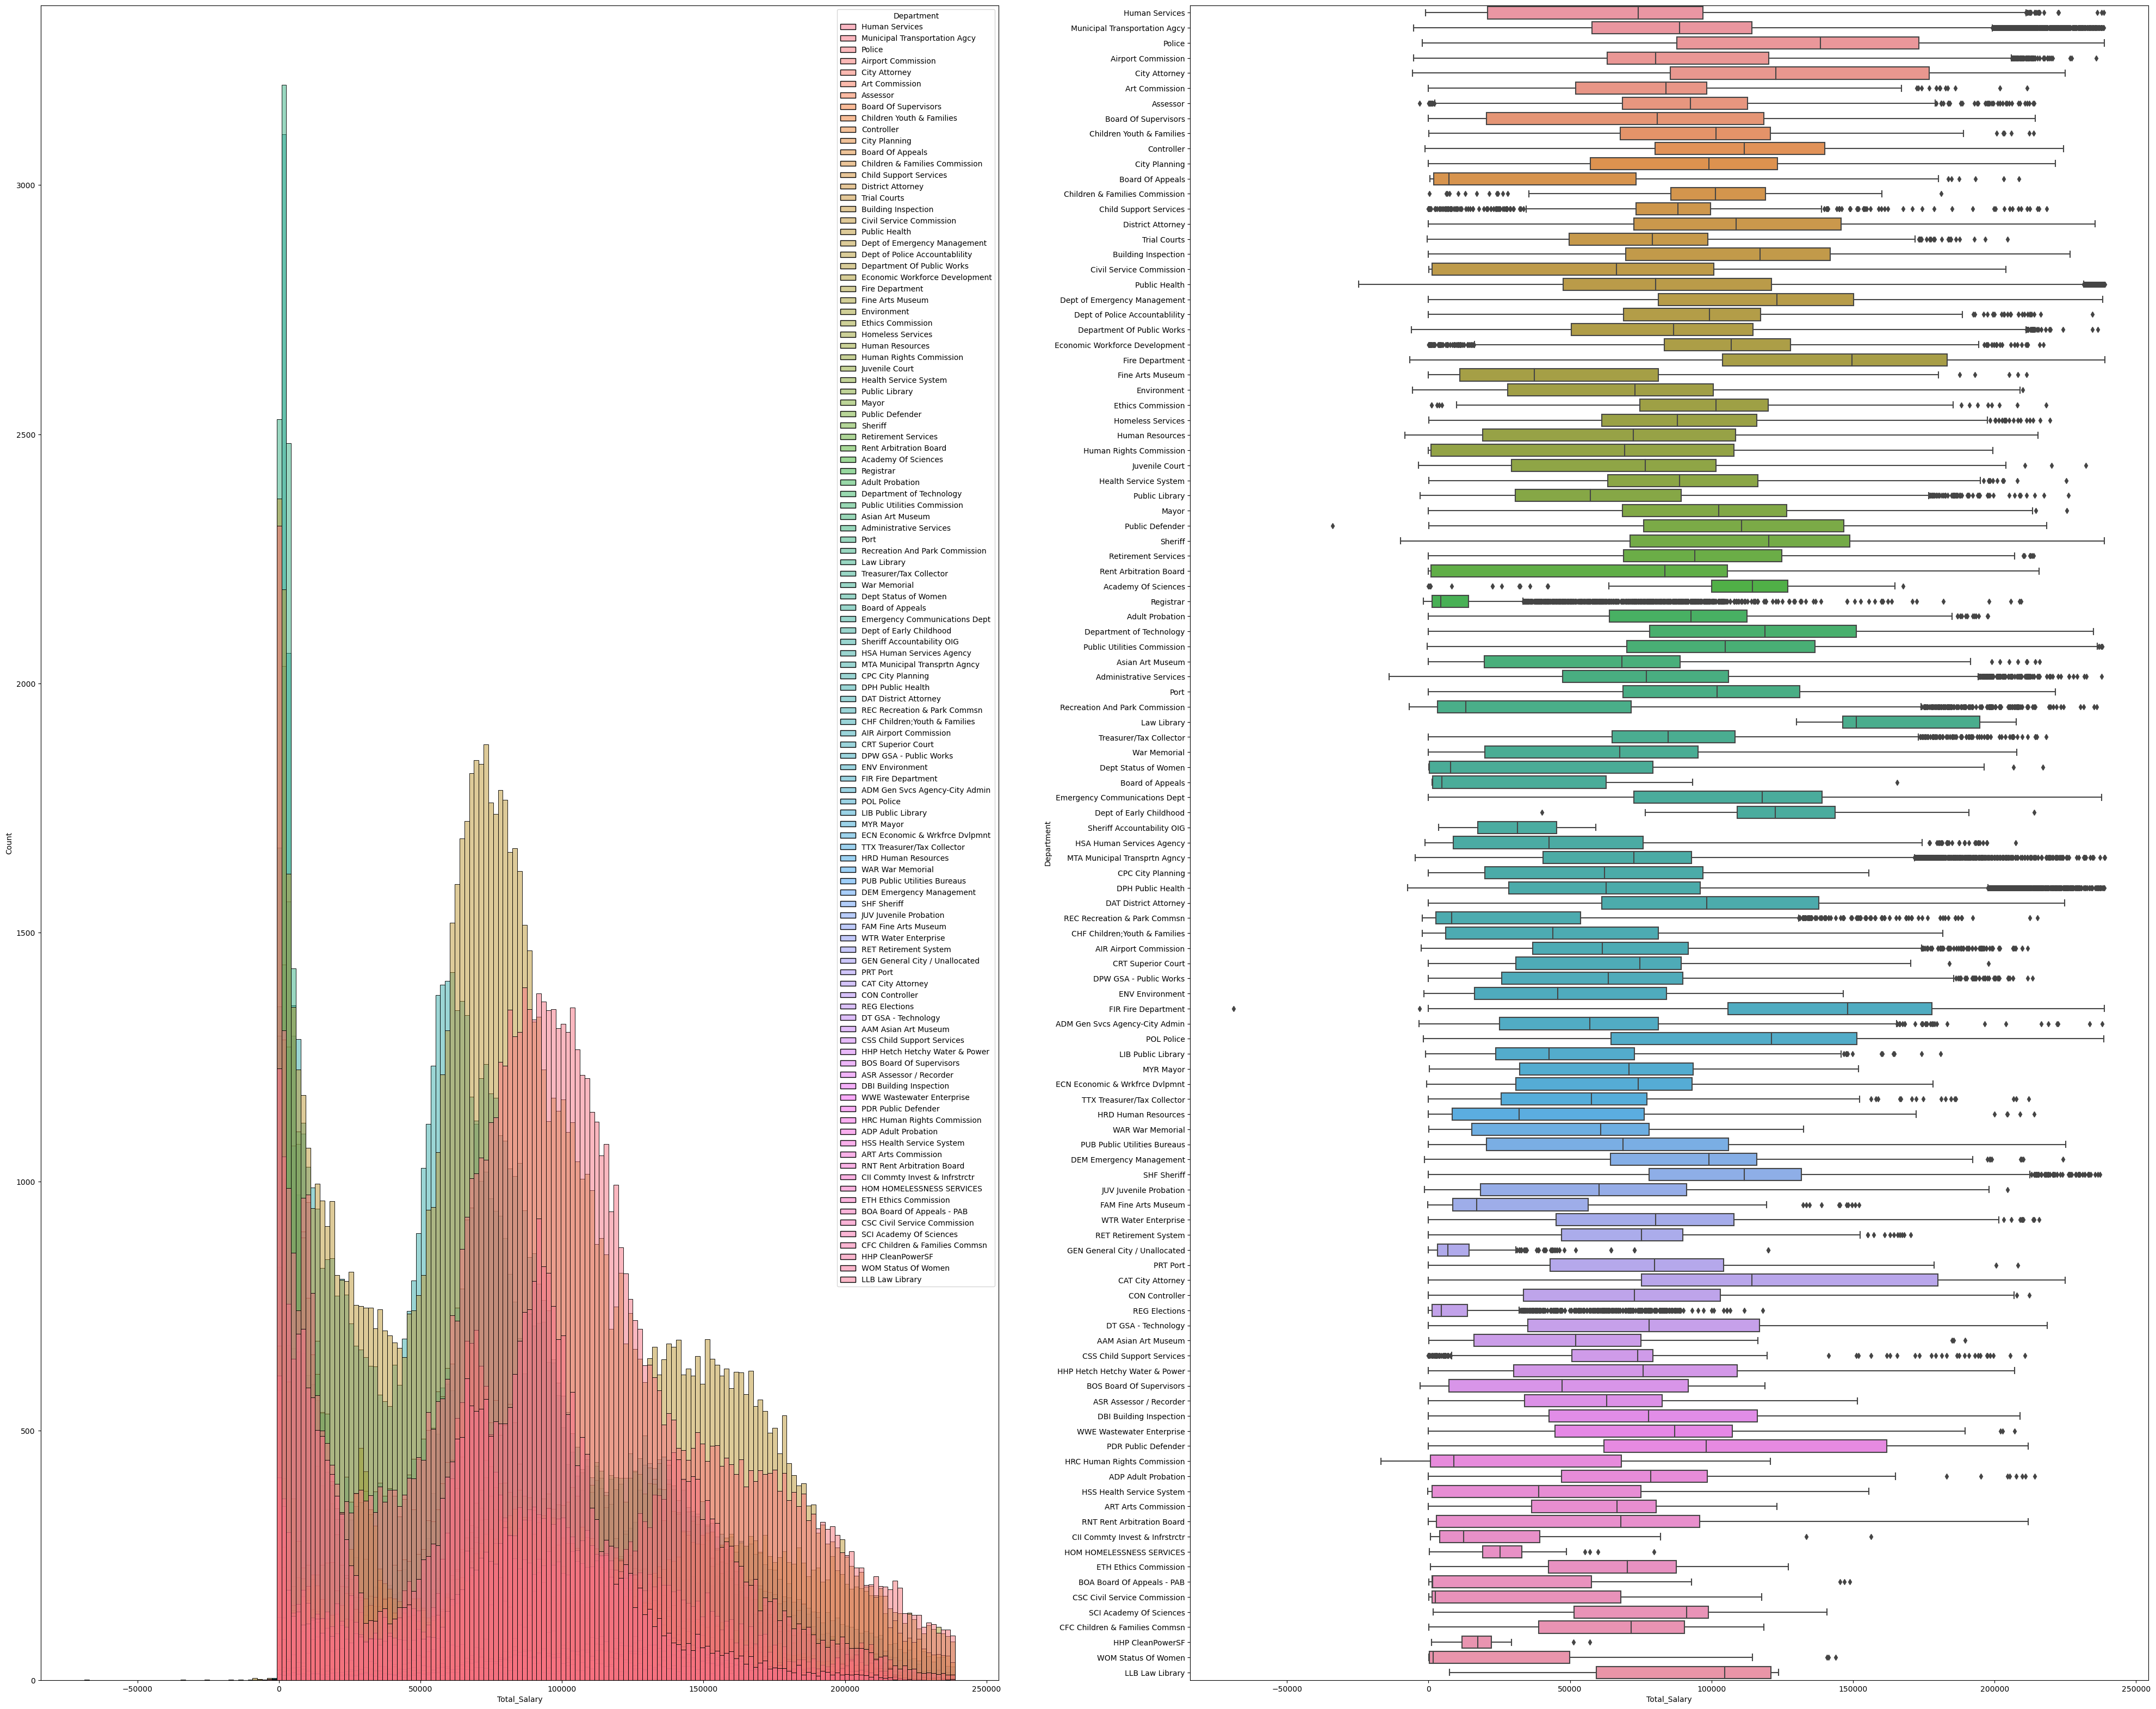

In [78]:
#Total Salary vs Department
fig,ax=plt.subplots(1,2, figsize=(50,40))
sns.histplot(x=data['Total_Salary'],hue=data['Department'],ax=ax[0])
sns.boxplot(x=data['Total_Salary'],y=data['Department'],ax=ax[1])

<Axes: xlabel='Total_Benefits', ylabel='Department'>

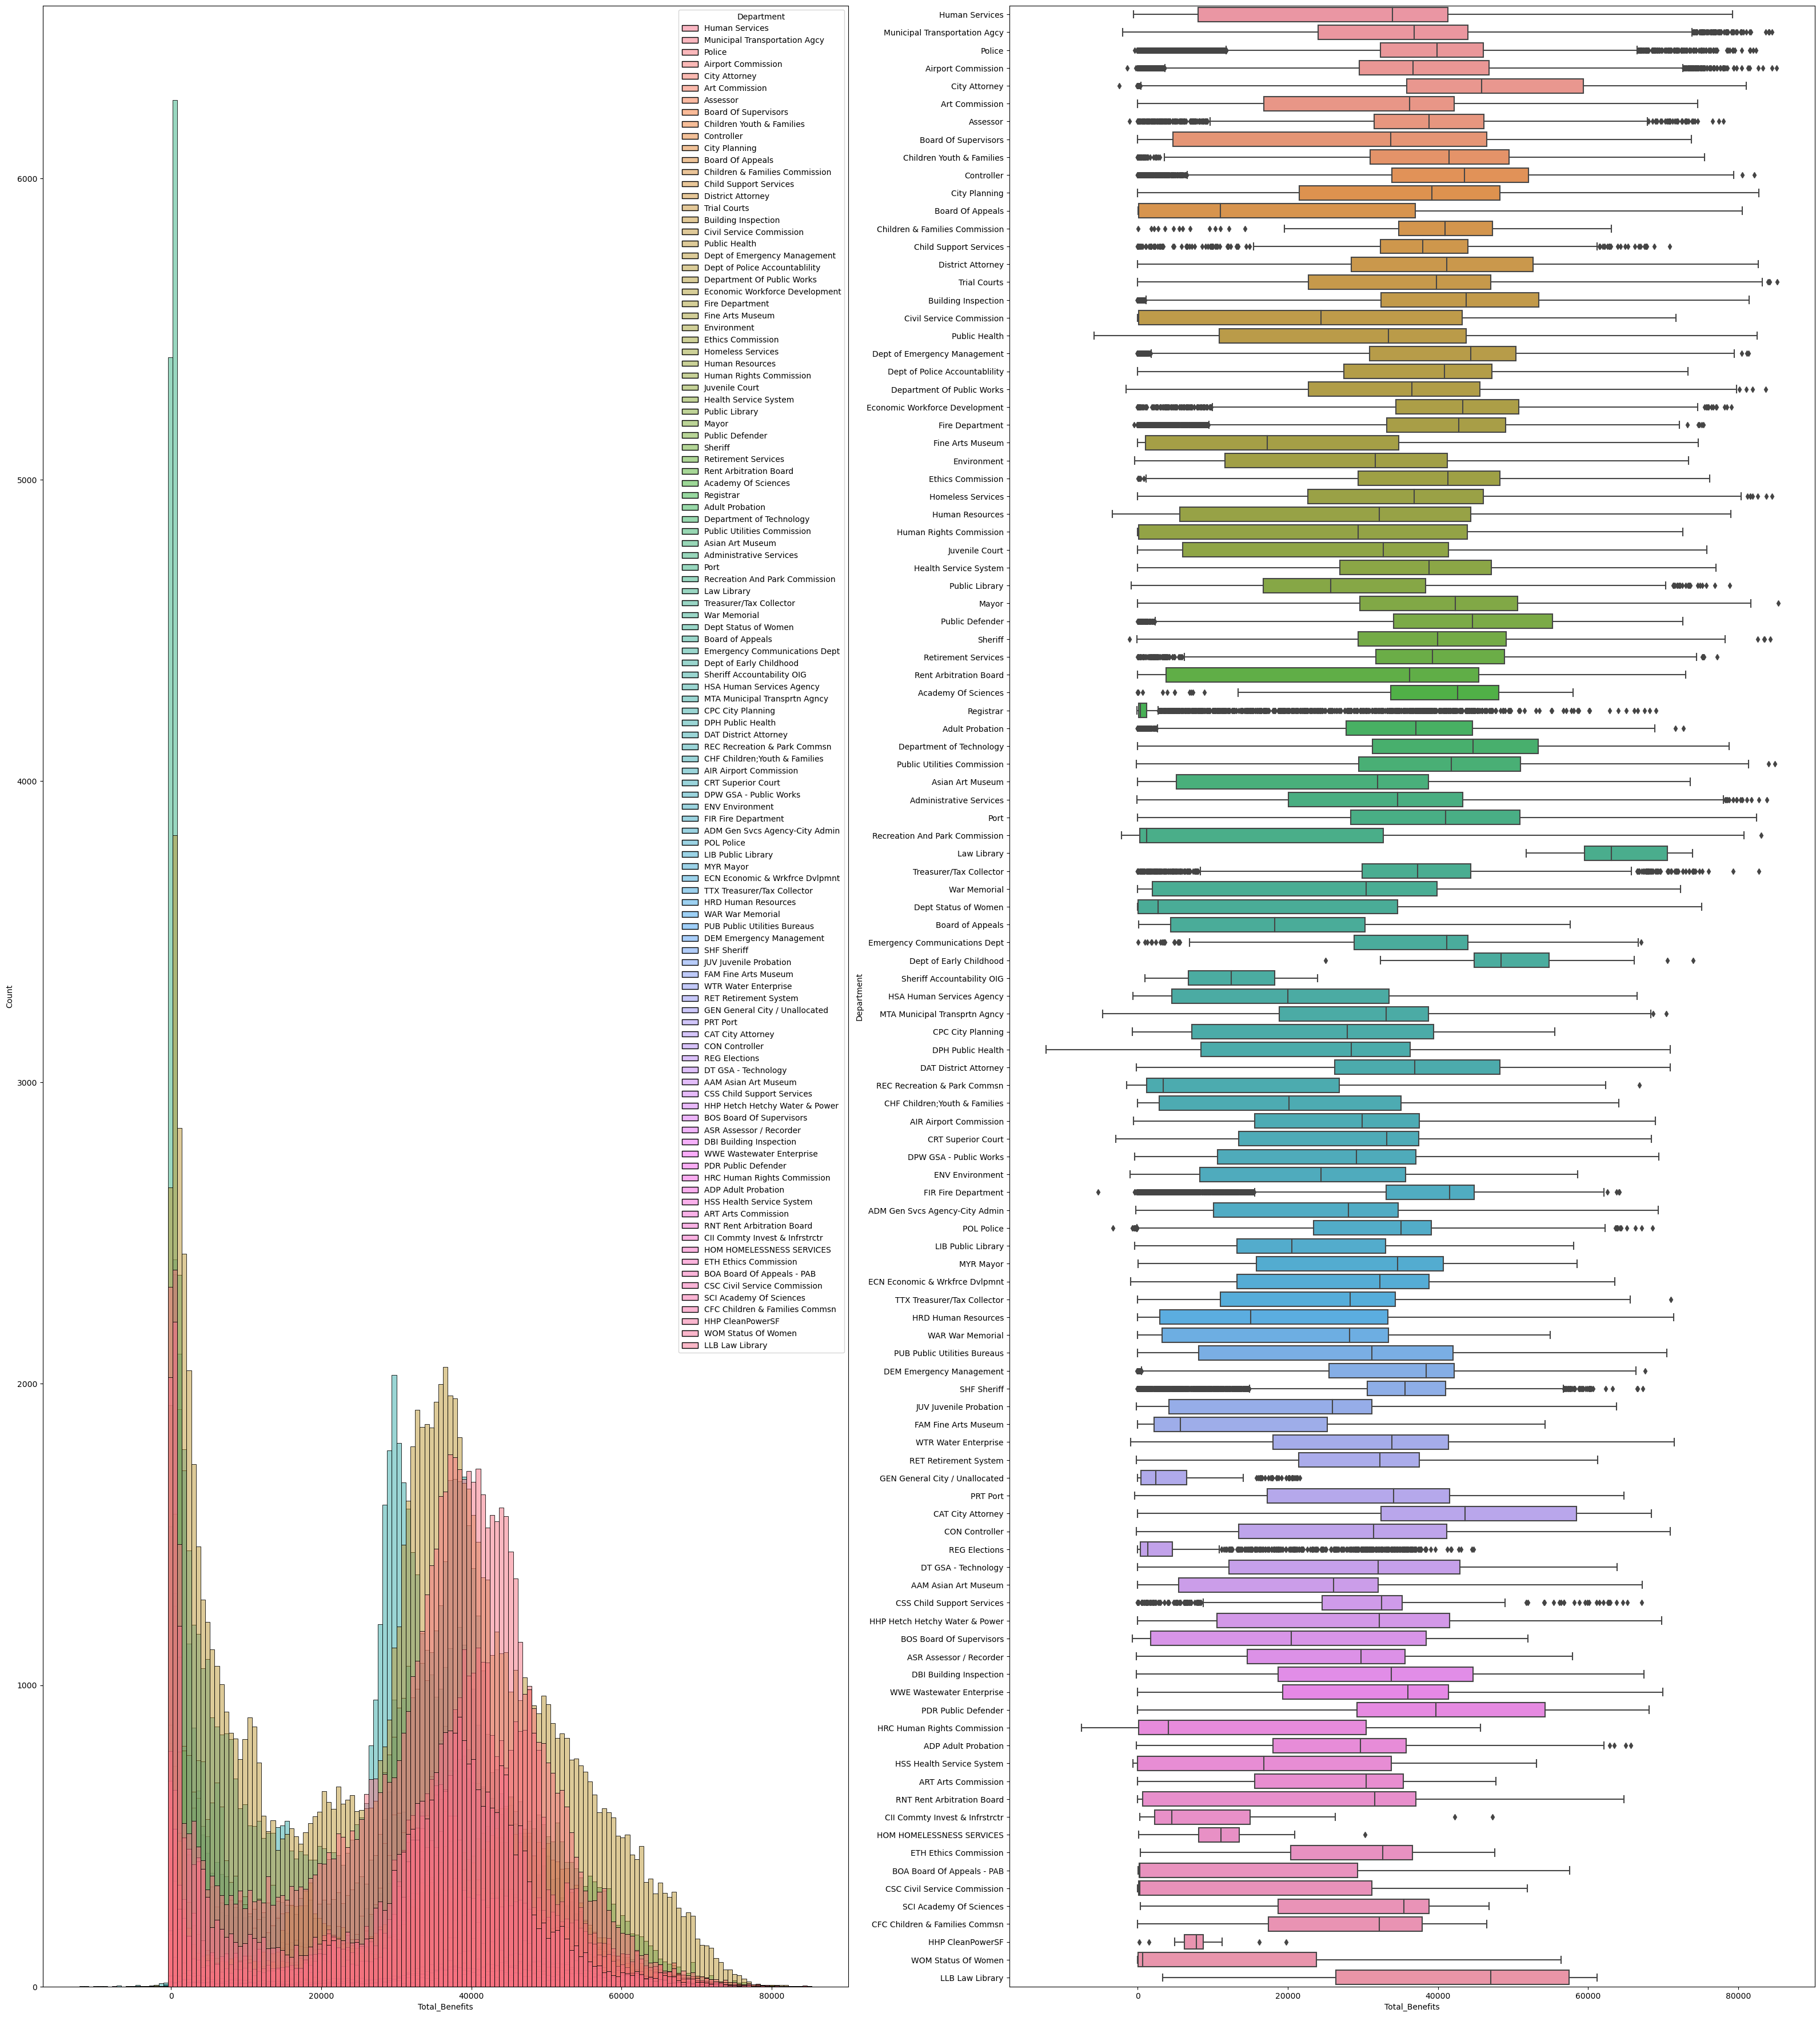

In [79]:
#Total benefits vs Department
fig,ax=plt.subplots(1,2, figsize=(40,45))
sns.histplot(x=data['Total_Benefits'],hue=data['Department'],ax=ax[0])
sns.boxplot(x=data['Total_Benefits'],y=data['Department'],ax=ax[1])

<Axes: xlabel='Overtime', ylabel='Department'>

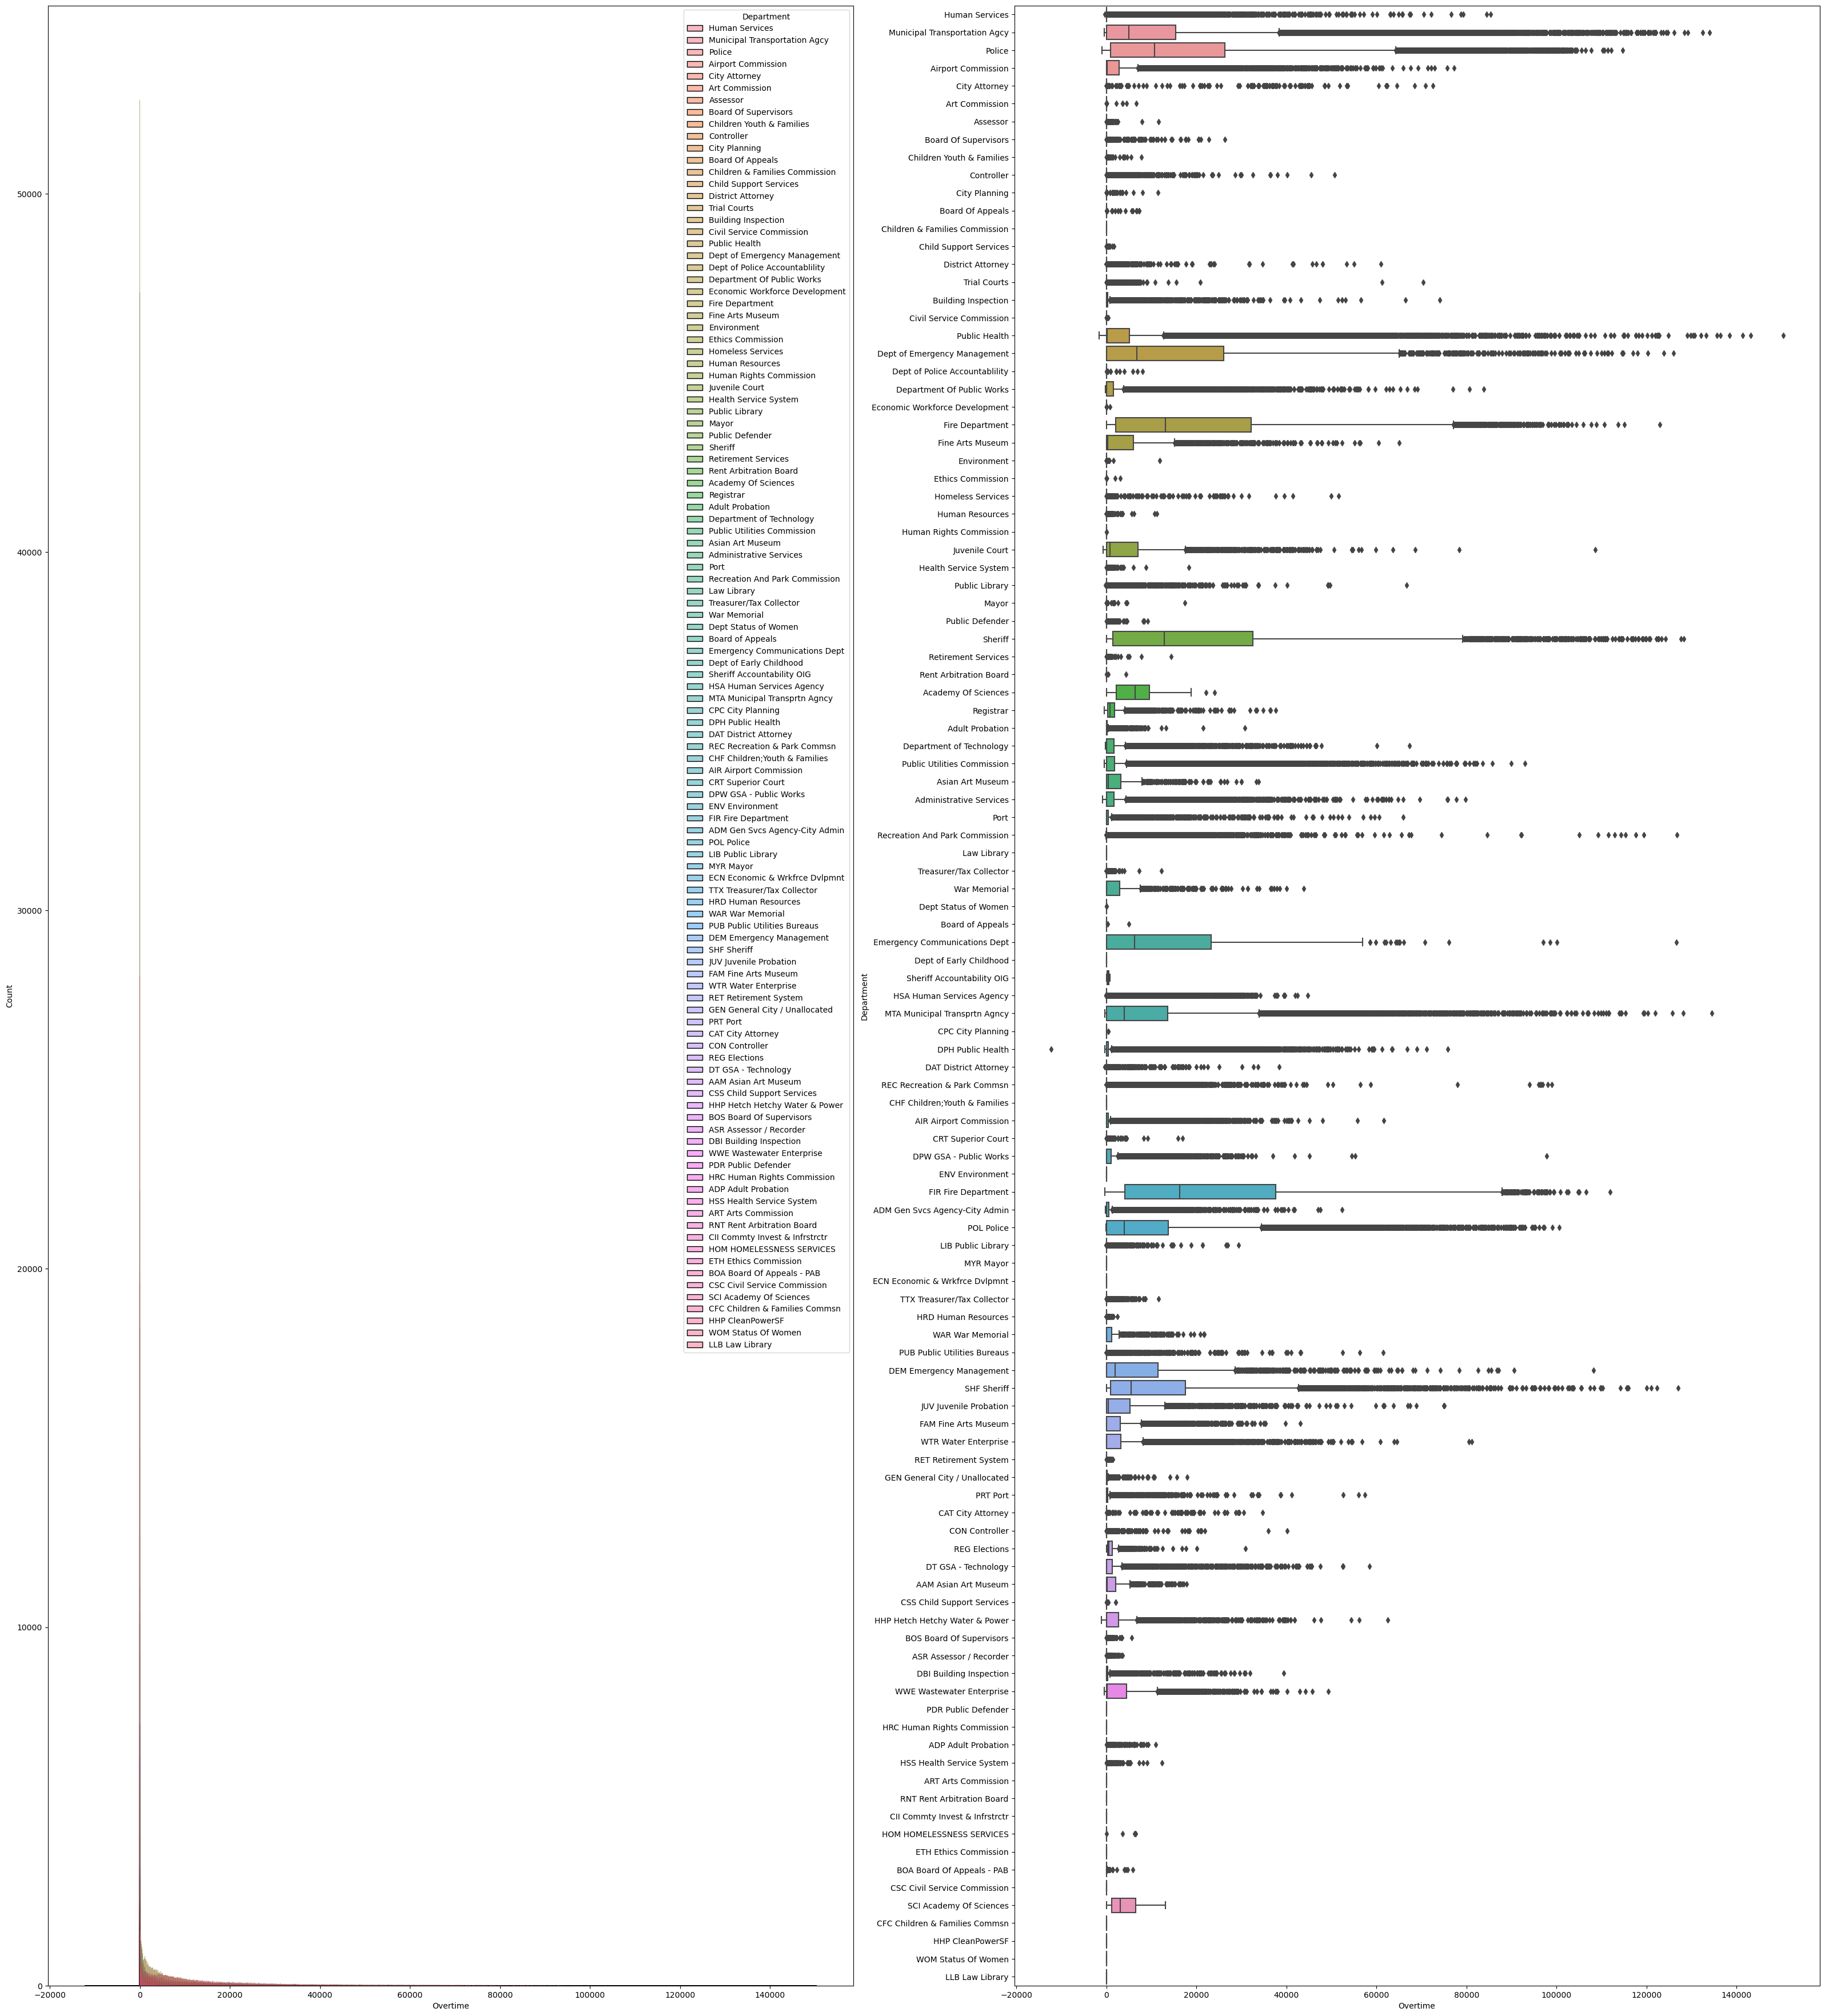

In [80]:
#Overtime vs Department
fig,ax=plt.subplots(1,2, figsize=(40,45))
sns.histplot(x=data['Overtime'],hue=data['Department'],ax=ax[0])
sns.boxplot(x=data['Overtime'],y=data['Department'],ax=ax[1])